# 영상 분류 사전 학습 모델 활용하기
- GoogleNet

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

import numpy as np
import matplotlib.pyplot as plt

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window 
font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [2]:
# 파이토치 관련 라이브러리
import torch
from torch import nn, optim
from torchinfo import summary
from torchviz import make_dot
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [3]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name  # window font

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [4]:
# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## GoogLeNet 불러 오기

### 모델 불러오기

In [7]:
#  라이브러리 임포트

# dir(models)
weights = models.GoogLeNet_Weights.IMAGENET1K_V1
net = models.googlenet(weights=weights)

In [8]:
# 모델 개요 표시 1
print(net)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
# 모델 개요 표시 2

summary(net, (100, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNet                                [100, 1000]               --
├─BasicConv2d: 1-1                       [100, 64, 112, 112]       --
│    └─Conv2d: 2-1                       [100, 64, 112, 112]       9,408
│    └─BatchNorm2d: 2-2                  [100, 64, 112, 112]       128
├─MaxPool2d: 1-2                         [100, 64, 56, 56]         --
├─BasicConv2d: 1-3                       [100, 64, 56, 56]         --
│    └─Conv2d: 2-3                       [100, 64, 56, 56]         4,096
│    └─BatchNorm2d: 2-4                  [100, 64, 56, 56]         128
├─BasicConv2d: 1-4                       [100, 192, 56, 56]        --
│    └─Conv2d: 2-5                       [100, 192, 56, 56]        110,592
│    └─BatchNorm2d: 2-6                  [100, 192, 56, 56]        384
├─MaxPool2d: 1-5                         [100, 192, 28, 28]        --
├─Inception: 1-6                         [100, 256, 28, 28]        --
│

## 파인 튜닝 없이 사용하기
### 영상 읽기

In [10]:
### Step 2: Read image
## rgb format, <class 'torch.Tensor'>
from torchvision.io import read_image

net.eval()

filename = "./figure/beagle.jpg"
img = read_image(filename) # torch.Size([3, 366, 640]) 
img = img.to(device)

##
print("img type = ", type(img))
print("img shape = ", img.shape) # torch.Size([3, 366, 640]))

img type =  <class 'torch.Tensor'>
img shape =  torch.Size([3, 366, 640])


### 영상 변환

In [11]:
# preprocess
# Scaling pixel values down to the [0, 1] range from their original [0, 255] range before applying normalization.
# ImageClassification(
#     crop_size=[224]
#     resize_size=[256]
#     mean=[0.485, 0.456, 0.406]
#     std=[0.229, 0.224, 0.225]
#     interpolation=InterpolationMode.BILINEAR
# )

preprocess = weights.transforms()
print(preprocess)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


### 변환 영상 확인하기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.3611333].


torch.Size([1, 3, 224, 224])


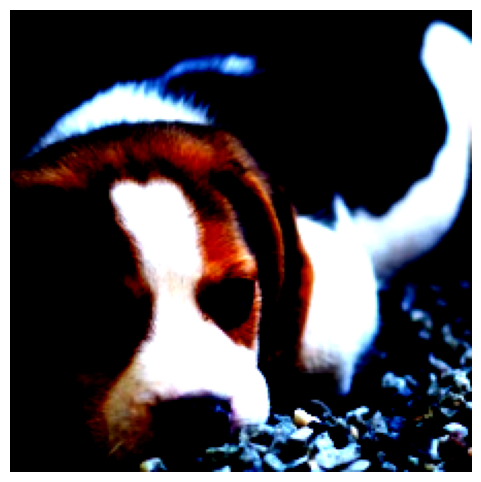

In [12]:
batch = preprocess(img).unsqueeze(0).to(device)
print(batch.shape)

##
processed_img = batch.data[0]
plt_img = processed_img.permute(1, 2, 0)

# plt_img.shape
plt.imshow(plt_img.cpu().numpy())
plt.grid(visible = None)
plt.axis("off")
plt.show()

In [13]:
# Step 5: Use the model and print the predicted category
net = net.to(device)
prediction = net(batch).softmax(1) # (1, 1000)
class_id = prediction.argmax().item() 
print("class id = ", class_id)

class id =  162


### 결과 확인 하기

In [14]:
display("category = \n", weights.meta["categories"])
print("category number = ", len(weights.meta["categories"]))

'category = \n'

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

category number =  1000


In [15]:
category_name = weights.meta["categories"][class_id]
category_name

'beagle'

## 전이 학습


### 데이터 준비

In [23]:
# 분류 클래스명 정의

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 분류 클래스 수는 10
n_output = len(classes)

In [24]:
# Transforms 정의

# 학습 데이터용 : 정규화에 반전과 RandomErasing 추가
transform_train = transforms.Compose([
  transforms.Resize(112),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5), 
  ])

# 검증 데이터용 : 정규화만 실시
transform = transforms.Compose([
  transforms.Resize(112),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

In [25]:
# 데이터 취득용 함수 dataset

data_root = './data'

train_set = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform_train)

# 검증 데이터셋
test_set = datasets.CIFAR10(
    root = data_root, train = False, 
    download = True, transform = transform)

In [26]:
# 배치 사이즈 지정
batch_size = 50

# 데이터로더

# 훈련용 데이터로더
# 훈련용이므로 셔플을 True로 설정함
train_loader = DataLoader(train_set, 
                          batch_size=batch_size, 
                          shuffle=True)

# 검증용 데이터로더
# 검증용은 셔플이 필요하지 않음
test_loader = DataLoader(test_set,  
                         batch_size=batch_size, 
                         shuffle=False) 

In [27]:
# 모델 개요 표시 1
print(net)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [28]:
# 모델 개요 표시 
summary(net,(100, 3, 112, 112))

Layer (type:depth-idx)                   Output Shape              Param #
GoogLeNet                                [100, 10]                 --
├─BasicConv2d: 1-1                       [100, 64, 56, 56]         --
│    └─Conv2d: 2-1                       [100, 64, 56, 56]         9,408
│    └─BatchNorm2d: 2-2                  [100, 64, 56, 56]         128
├─MaxPool2d: 1-2                         [100, 64, 28, 28]         --
├─BasicConv2d: 1-3                       [100, 64, 28, 28]         --
│    └─Conv2d: 2-3                       [100, 64, 28, 28]         4,096
│    └─BatchNorm2d: 2-4                  [100, 64, 28, 28]         128
├─BasicConv2d: 1-4                       [100, 192, 28, 28]        --
│    └─Conv2d: 2-5                       [100, 192, 28, 28]        110,592
│    └─BatchNorm2d: 2-6                  [100, 192, 28, 28]        384
├─MaxPool2d: 1-5                         [100, 192, 14, 14]        --
├─Inception: 1-6                         [100, 256, 14, 14]        --
│

In [29]:
print(net.fc)
print(net.fc.in_features)
print(net.fc.out_features)

Linear(in_features=1024, out_features=10, bias=True)
1024
10


In [30]:
n_output = 10

in_features = net.fc.in_features
net.fc = nn.Linear(in_features, n_output)

In [31]:
# 모델 개요 표시 1
print(net)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

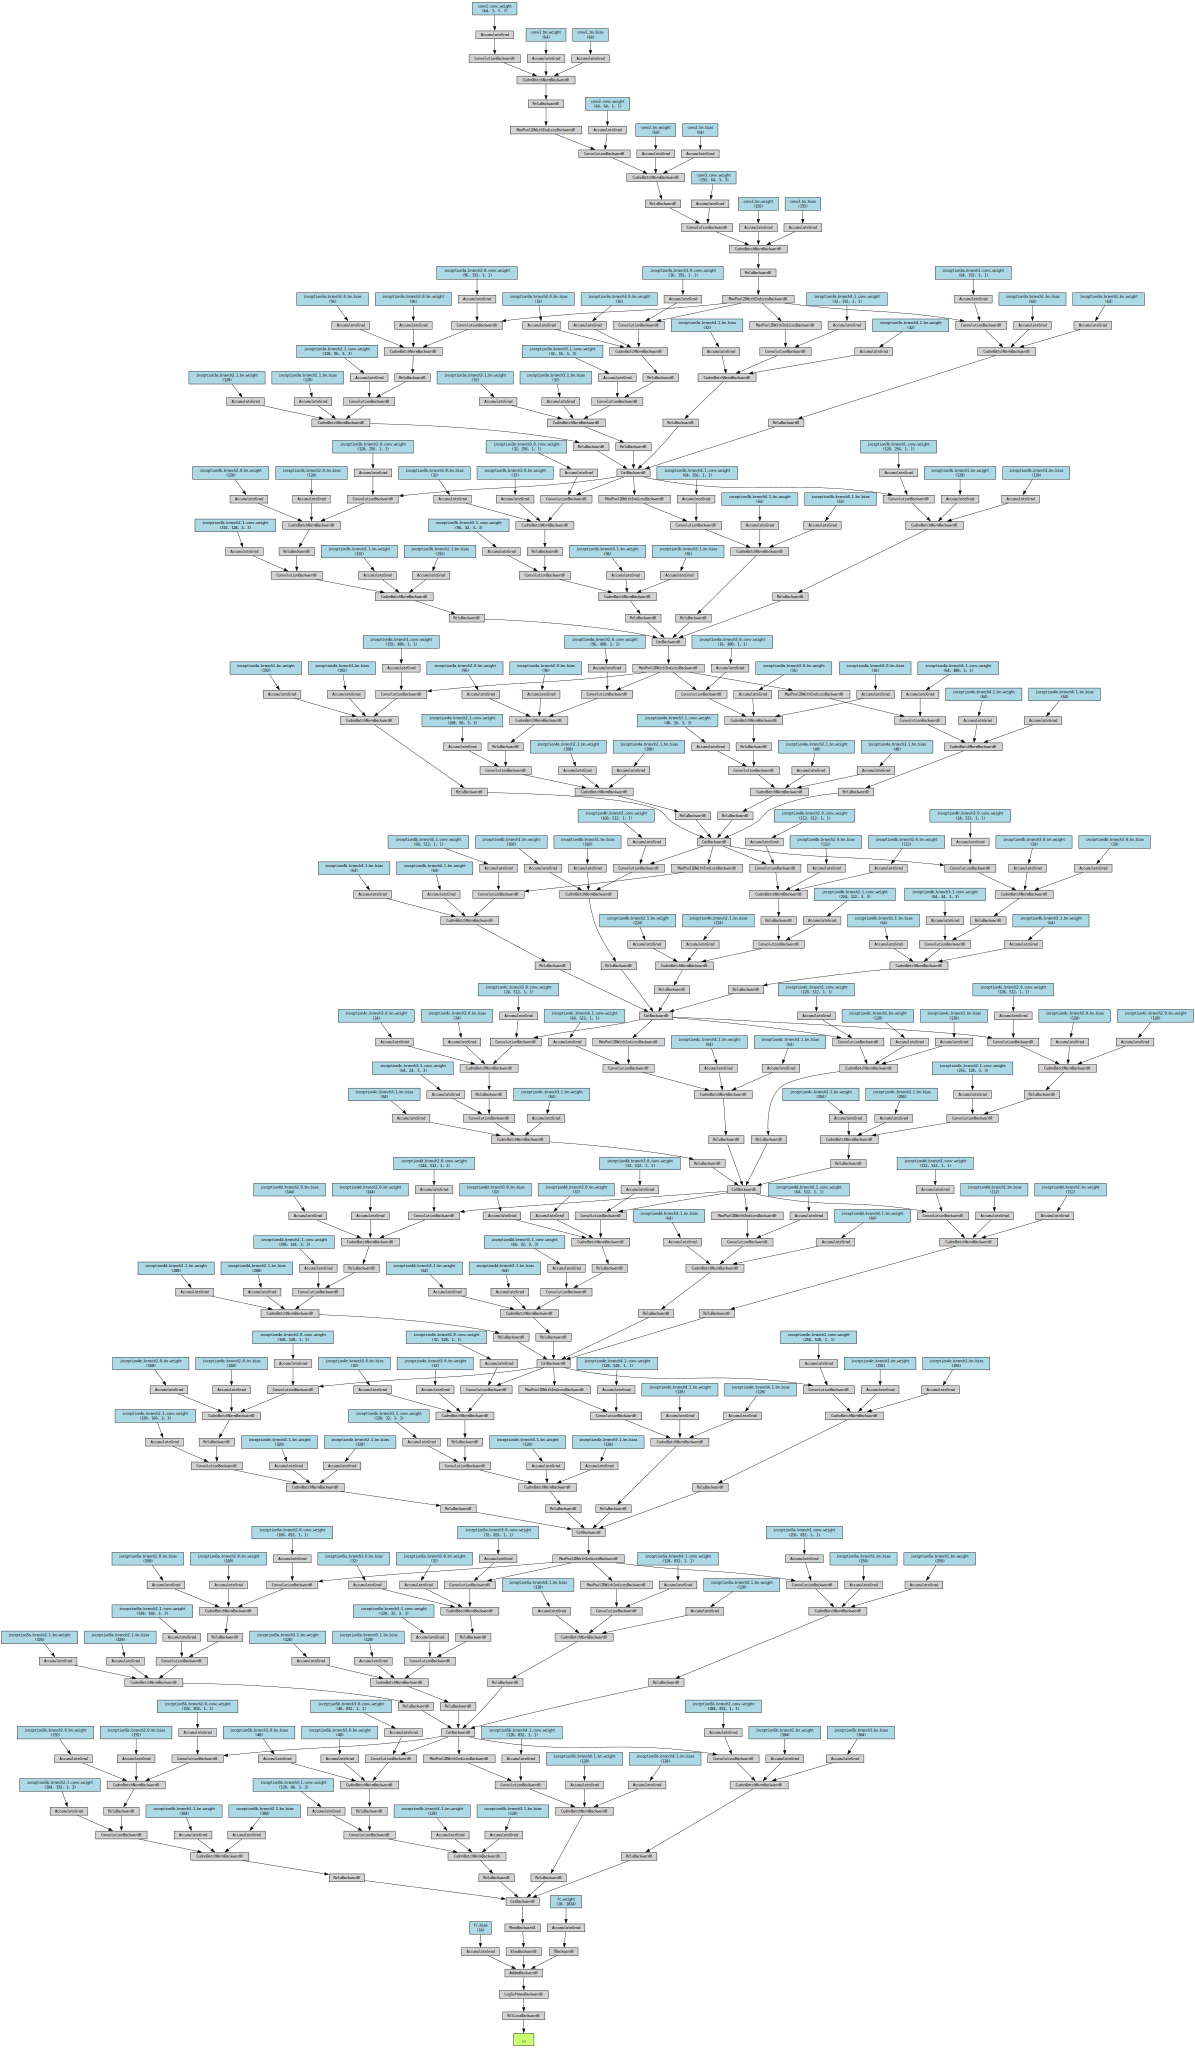

In [33]:
# 손실 계산 그래프 시각화
# eval_loss (손실 계산)
for images, labels in test_loader:
    break
inputs = images.to(device)
labels = labels.to(device)

# 예측 계산
net = net.to(device)
outputs = net(inputs)

criterion = nn.CrossEntropyLoss()

    # 손실 계산
loss = criterion(outputs, labels)

# 손실 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

## 학습과 결과 평가

### 초기 설정

In [37]:

# 사전 학습 모델 불러오기
# pretraind = True로 학습을 마친 파라미터도 함께 불러오기
weights = models.GoogLeNet_Weights.IMAGENET1K_V1
net = models.googlenet(weights=weights)

# 최종 레이어 함수 입력 차원수 확인
in_features = net.fc.in_features
net.fc = nn.Linear(in_features, n_output)

# 최종 레이어 함수 교체
net.fc = nn.Linear(in_features, n_output)

# GPU 사용
net = net.to(device)

# 학습률
lr = 0.001

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 최적화 함수 정의
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# history 파일 초기화
history = np.zeros((0, 5))

### 학습

In [38]:
# 학습
num_epochs = 5
from tqdm.notebook import tqdm

base_epochs = len(history) # => 0
batch_size_train = len(train_loader)
batch_size_test = len(test_loader)

for epoch in range(base_epochs, num_epochs+base_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    # 훈련 페이즈
    net.train() # dropout, batch normalization 활성화
    # count = 0

    for inputs, labels in tqdm(train_loader):
        # count += len(labels)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화
        optimizer.zero_grad()

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)
        train_loss += loss.item()

        # 경사 계산
        loss.backward()

        # 파라미터 수정
        optimizer.step()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 정답 건수 산출
        train_acc += (predicted == labels).sum().item() /len(labels)

        # 손실과 정확도 계산
    avg_train_loss = train_loss / batch_size_train
    avg_train_acc = train_acc / batch_size_train

    # 예측 페이즈
    net.eval()
    # count = 0

    for inputs, labels in test_loader:
        # count += len(labels)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 예측 계산
        outputs = net(inputs)

        # 손실 계산
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        # 예측 라벨 산출
        predicted = torch.max(outputs, 1)[1]

        # 정답 건수 산출
        val_acc += (predicted == labels).sum().item() /len(labels)

        # 손실과 정확도 계산
    avg_val_loss = val_loss / batch_size_test
    avg_val_acc = val_acc / batch_size_test

    print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
    item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
    history = np.vstack((history, item))

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [1/5], loss: 0.61930 acc: 0.80556 val_loss: 0.29483, val_acc: 0.90000


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [2/5], loss: 0.25037 acc: 0.91584 val_loss: 0.22958, val_acc: 0.92200


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [3/5], loss: 0.16465 acc: 0.94500 val_loss: 0.21532, val_acc: 0.92740


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [4/5], loss: 0.11069 acc: 0.96312 val_loss: 0.20263, val_acc: 0.93450


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch [5/5], loss: 0.07292 acc: 0.97730 val_loss: 0.20161, val_acc: 0.93640


### 학습 결과 평가

초기상태 : 손실 : 0.29483  정확도 : 0.90000
최종상태 : 손실 : 0.20161  정확도 : 0.93640


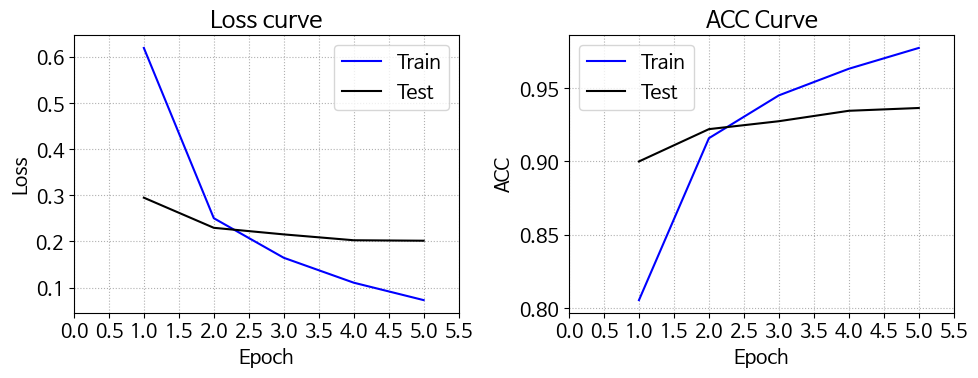

In [39]:
# 손실과 정확도 확인
print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}') 
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

num_epochs = len(history)
unit = num_epochs / 10

fig, axs = plt.subplots(1, 2, figsize = (10, 4))
# 학습 곡선 출력(손실)
# plt.figure(figsize=(9,8))
axs[0].plot(history[:,0], history[:,1], 'b', label='Train')
axs[0].plot(history[:,0], history[:,3], 'k', label='Test')
axs[0].set_xticks(np.arange(0,num_epochs+1, unit))
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss curve')
axs[0].legend()


# 학습 곡선 출력(정확도)
# plt.figure(figsize=(9,8))
axs[1].plot(history[:,0], history[:,2], 'b', label='Train')
axs[1].plot(history[:,0], history[:,4], 'k', label='Test')
axs[1].set_xticks(np.arange(0,num_epochs+1,unit))
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('ACC')
axs[1].set_title('ACC Curve')
axs[1].legend()

plt.tight_layout()
plt.show()